# Line fitting through noisy data in 1-D

In this simple example, we fit a straight line through a cloud of artificially computed data points $d_i^{obs}$ that are polluted by random errors. We proceed in the following steps: (1) Computation of artificial data. (2) Computation of the inverse data weighting matrix $\mathbf{C}_D^{-1}$ and of the Moore-Penrose inverse $(\mathbf{G}^T\mathbf{C}_D^{-1}\mathbf{G})^{-1}\mathbf{G}^T\mathbf{C}_D^{-1}$. (3) Computation and visualisation of the estimated model $\mathbf{m}^{est}$. 

# 0. Import some Python packages

Before running any computations, we import a couple of Python packages, mostly for plotting and for matrix inversion.

In [1]:
# Some Python packages.

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.special as special
import random

# Set some parameters to make plots nicer.

plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 20})

# 1. Setup and artificial data

In the absence of any real observed data, we compute artificial data $\mathbf{d}^{obs}$ using a random number generator. The artificial data will therefore look different each time you run the code.

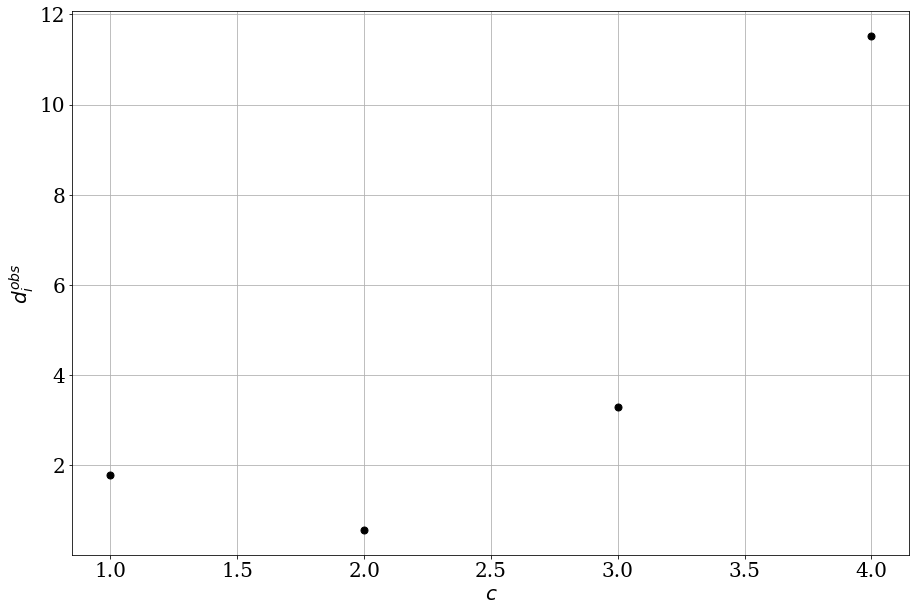

In [13]:
# Input. ----------------------------------------------------

N=4 # Total number of experiments (measurement points).

# Make artificial data. -------------------------------------

# Control variable (e.g., position, temperature, ..., of the measurements)
c=np.arange(N,dtype=float)+1.0

# Data with random errors.
d=c+1.0

for i in range(N):
    d[i]+=random.gauss(0.0,1.0)

# To make things a bit more difficult, we introduce an outlier.
d[-1]=2.0*d[-1]


# Plot the artificial data. ---------------------------------

plt.subplots(figsize=(15, 10))
plt.plot(c,d,'ko',markersize=7)
plt.grid()
plt.xlabel(r'$c$')
plt.ylabel(r'$d_i^{obs}$')
plt.title(r'artificial data, $d_i^{obs}$')
#plt.savefig("line_fitting_forward.pdf", bbox_inches='tight')
plt.show()

# 2. Data weights and Moore-Penrose inverse

We continue with the computation of the inverse data weighting matrix $\mathbf{C}_D^{-1}$ and of the Moore-Penrose inverse $(\mathbf{G}^T\mathbf{C}_D^{-1}\mathbf{G})^{-1}\mathbf{G}^T\mathbf{C}_D^{-1}$.

In [14]:
# Inverse of the data weighting matrix. ---------------------

# These weights can be adjusted depending on the credibility (observational errors) of the individual data points.

Cinv=np.identity(N)
Cinv[3,3]=1.0 

# Forward modelling matrix, G. ------------------------------

G=np.ones((N,2))
G[:,0]=c

GT=np.dot(np.transpose(G),Cinv)

# Moore-Penrose inverse. ------------------------------------

GTGinv=np.linalg.inv(np.dot(GT,G))

# 3. Estimated model and best-fitting line

Finally, we use the Moore-Penrose inverse to compute the estimated model $\mathbf{m}^{est}$. The estimated model parameters $m_1$ and $m_2$ are then used to predict observations for arbitrary values of the control parameter $c$.

m1=3.195638, m2=-3.694974


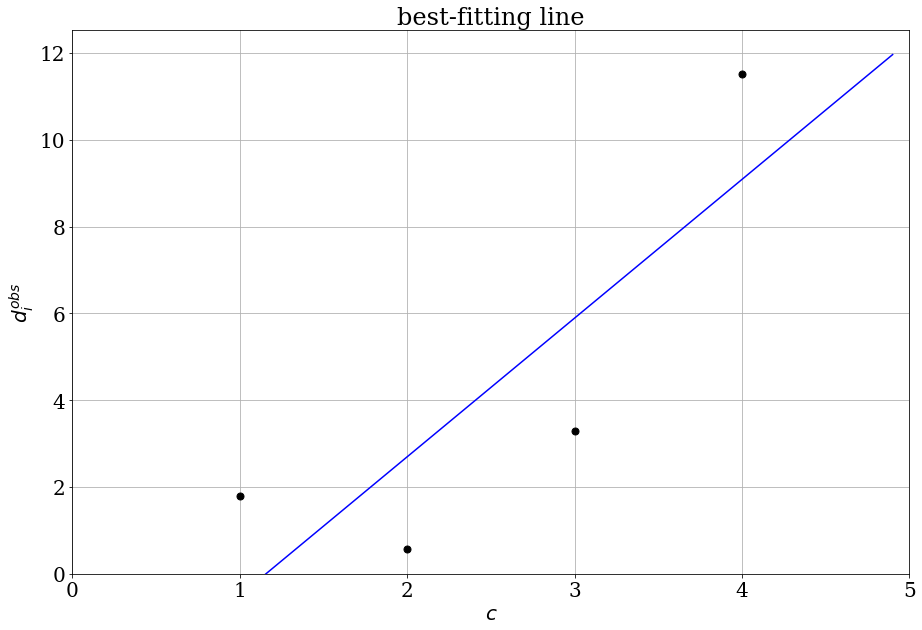

In [16]:
# Compute estimated model. ----------------------------------

m_est=np.dot(GTGinv,np.dot(GT,d))

# Compute line using the esitmated model parameters. --------

x=np.arange(0.0,np.max(c)+1.0,0.1)
y=m_est[1]+x*m_est[0]

# Print the estimated model parameters. ---------------------

print('m1=%f, m2=%f' % (m_est[0], m_est[1]))

# Plot line and data points. --------------------------------

plt.subplots(figsize=(15, 10))
plt.plot(c,d,'ko',markersize=7)
plt.plot(x,y,'b')
plt.grid()
plt.xlabel(r'$c$',fontsize=20)
plt.ylabel(r'$d_i^{obs}$',fontsize=20)
plt.title('best-fitting line')

plt.xlim((0.0,c[-1]+1.0))
plt.ylim((0.0,d[-1]+1.0))

plt.show()